# Feedforward Neural Network on SEEDS DATASET
### Various Optimizers

## Momentum based GD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
# Loading dataset, splitting into training and test set
dataset = np.loadtxt("seeds_dataset.txt")
np.random.shuffle(dataset)
len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

X = train[:,:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
N,p = X.shape
out_neurons = Y.shape[1]

Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (210, 8)
Each Datapoint contains  7 features and belong to either of  3 class.


In [3]:
# Standardization of dataset
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(p):
    mean_and_std["mean"+str(i)] = np.mean(X[:,i])
    mean_and_std["std"+str(i)] = np.std(X[:,i])
# Now standardizing the training set
for i in range(p):
    X[:,i] = (X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

In [4]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [5]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [6]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [7]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [8]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [7, 12, 8, 3]


In [9]:
# Initializing the "updates" for momentum
# update_t = (gamma*update_t-1) + (learningRate*gradient(parameter))
# update rule:  W = W -update_t
# making a dictionary same as parameter_init()

def update_init(layers):
    updates = {}
    for i in range(1,len(layers)):
        updates["updateW"+str(i)] = np.zeros((layers[i],layers[i-1]))
        updates["updateb"+str(i)] = np.zeros((layers[i],1))
    return (updates)
# Initialize updates
updates = update_init(structure)

# define gamma
gamma = 0.9

100%|██████████| 4000/4000 [00:03<00:00, 1320.67it/s]


Training Cost 0.004844686842240702


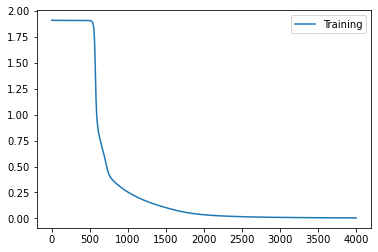

In [10]:
# Implementation of Network using Gradient Descent
epochs = 4000
alpha = 0.1
costs = []
for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates using momentum
    updates["updateW3"] = (gamma* updates["updateW3"]) + (alpha*dL_dW3)
    parameters["W3"] = parameters["W3"] - updates["updateW3"]
    updates["updateb3"] = (gamma* updates["updateb3"]) + (alpha*dL_db3)
    parameters["b3"] = parameters["b3"] - updates["updateb3"]
    
    updates["updateW2"] = (gamma* updates["updateW2"]) + (alpha*dL_dW2)
    parameters["W2"] = parameters["W2"] - updates["updateW2"]
    updates["updateb2"] = (gamma* updates["updateb2"]) + (alpha*dL_db2)
    parameters["b2"] = parameters["b2"] - updates["updateb2"]
    
    updates["updateW1"] = (gamma* updates["updateW1"]) + (alpha*dL_dW1)
    parameters["W1"] = parameters["W1"] - updates["updateW1"]
    updates["updateb1"] = (gamma* updates["updateb1"]) + (alpha*dL_db1)
    parameters["b1"] = parameters["b1"] - updates["updateb1"]
    
    costs.append(compute_cost(h3.T,Y))

print("Training Cost",costs[-1])
plt.plot(costs,label = "Training")
plt.legend()
plt.show()

In [11]:
# Prediction
k=72
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [1 0 0] 	
y= [9.99916268e-01 8.06622123e-05 3.06958307e-06]


In [12]:
# Prediction on test set

# Standardizing the test set
for i in range(p):
    Xt[:,i] = (Xt[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]


#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.12207077514477618


In [13]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")

The number of datapoints in test set wrongly labeled by the NN is/are  2 out of total  53 datapoints


### Nesterov Momentum

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [15]:
# Loading dataset, splitting into training and test set
dataset = np.loadtxt("seeds_dataset.txt")
np.random.shuffle(dataset)
len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

X = train[:,:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
N,p = X.shape
out_neurons = Y.shape[1]

Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (210, 8)
Each Datapoint contains  7 features and belong to either of  3 class.


In [16]:
# Standardization of dataset
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(p):
    mean_and_std["mean"+str(i)] = np.mean(X[:,i])
    mean_and_std["std"+str(i)] = np.std(X[:,i])
# Now standardizing the training set
for i in range(p):
    X[:,i] = (X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

In [17]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [18]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [19]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [20]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [21]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [7, 12, 8, 3]


In [22]:
# Initializing the "updates" for Nestrov momentum
# W_lookAhead = W_t - (gamma*update_t-1)
# update_t = (gamma*update_t-1) + (learningRate*gradient(W_lookAhead))
# update rule:  W = W -update_t
# making a dictionary same as parameter_init()

def update_init(layers):
    updates = {}
    for i in range(1,len(layers)):
        updates["updateW"+str(i)] = np.zeros((layers[i],layers[i-1]))
        updates["updateb"+str(i)] = np.zeros((layers[i],1))
    return (updates)
# Initialize updates
updates = update_init(structure)


def lookahead_init(layers):
    lookaheads = {}
    for i in range(1,len(layers)):
        lookaheads["lookahead_W"+str(i)] = np.zeros((layers[i],layers[i-1]))
        lookaheads["lookahead_b"+str(i)] = np.zeros((layers[i],1))
    return (lookaheads)
#Initialize lookaheads
lookaheads = lookahead_init(structure)
# define gamma
gamma = 0.9

100%|██████████| 3500/3500 [00:03<00:00, 890.54it/s]


Training Cost 0.008323879113016262


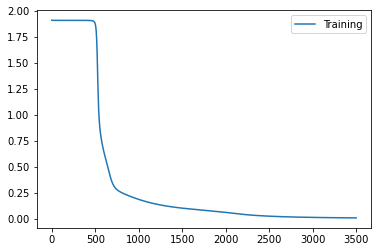

In [23]:
# Implementation of Network using Gradient Descent
epochs = 3500
alpha = 0.1
costs = []
for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates using nestrov momentum
    lookaheads["lookahead_W3"] = parameters["W3"] - (gamma*updates["updateW3"])
    dL_da3_LA = -( Y.T - h3)
    dL_dW3_LA = (1/N)*np.dot(dL_da3_LA , h2.T)             # Lookaheads, also see lookaheads for W2, W1
    dL_db3_LA = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    updates["updateW3"] = (gamma* updates["updateW3"]) + (alpha*dL_dW3_LA)
    parameters["W3"] = parameters["W3"] - updates["updateW3"]
    
    lookaheads["lookahead_b3"] = parameters["b3"] - (gamma*updates["updateb3"])    
    updates["updateb3"] = (gamma* updates["updateb3"]) + (alpha*dL_db3_LA)
    parameters["b3"] = parameters["b3"] - updates["updateb3"]
    
    lookaheads["lookahead_W2"] = parameters["W2"] - (gamma*updates["updateW2"])
    dL_dh2_LA = np.dot(lookaheads["lookahead_W3"].T , dL_da3_LA)
    dL_da2_LA = np.multiply(dL_dh2_LA,sigmoid_derivative(a2))
    dL_dW2_LA = (1/N)*np.dot(dL_da2_LA , h1.T)
    dL_db2_LA = (1/N)*(np.sum(dL_da2_LA,axis=1,keepdims = True))
    updates["updateW2"] = (gamma* updates["updateW2"]) + (alpha*dL_dW2_LA)
    parameters["W2"] = parameters["W2"] - updates["updateW2"]
    
    lookaheads["lookahead_b2"] = parameters["b2"] - (gamma*updates["updateb2"])
    updates["updateb2"] = (gamma* updates["updateb2"]) + (alpha*dL_db2_LA)
    parameters["b2"] = parameters["b2"] - updates["updateb2"]
    
    lookaheads["lookahead_W1"] = parameters["W1"] - (gamma*updates["updateW1"])
    dL_dh1_LA = np.dot(lookaheads["lookahead_W2"].T , dL_da2_LA)
    dL_da1_LA = np.multiply(dL_dh1_LA,sigmoid_derivative(a1))
    dL_dW1_LA = (1/N)*np.dot(dL_da1_LA , X)
    dL_db1_LA = (1/N)*(np.sum(dL_da1_LA,axis = 1,keepdims = True))
    updates["updateW1"] = (gamma* updates["updateW1"]) + (alpha*dL_dW1_LA)
    parameters["W1"] = parameters["W1"] - updates["updateW1"]
    lookaheads["lookahead_b1"] = parameters["b1"] - (gamma*updates["updateb1"])
    updates["updateb1"] = (gamma* updates["updateb1"]) + (alpha*dL_db1_LA)
    parameters["b1"] = parameters["b1"] - updates["updateb1"]
    
    
    costs.append(compute_cost(h3.T,Y))
print("Training Cost",costs[-1])
plt.plot(costs,label = "Training")
plt.legend()
plt.show()

In [24]:
# Prediction
k=72
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [0 0 1] 	
y= [7.02826593e-05 1.70420434e-09 9.99929716e-01]


In [25]:
# Prediction on test set

# Standardizing the test set
for i in range(p):
    Xt[:,i] = (Xt[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]


#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.4962500520759627


In [26]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")

The number of datapoints in test set wrongly labeled by the NN is/are  4 out of total  53 datapoints


### AdaGrad

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [28]:
# Loading dataset, splitting into training and test set
dataset = np.loadtxt("seeds_dataset.txt")
np.random.shuffle(dataset)
len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

X = train[:,:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
N,p = X.shape
out_neurons = Y.shape[1]

Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (210, 8)
Each Datapoint contains  7 features and belong to either of  3 class.


In [29]:
# Standardization of dataset
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(p):
    mean_and_std["mean"+str(i)] = np.mean(X[:,i])
    mean_and_std["std"+str(i)] = np.std(X[:,i])
# Now standardizing the training set
for i in range(p):
    X[:,i] = (X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

In [30]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [31]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [32]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [33]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [34]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [7, 12, 8, 3]


100%|██████████| 1000/1000 [00:00<00:00, 1212.78it/s]


Training Cost 0.01856253507940808


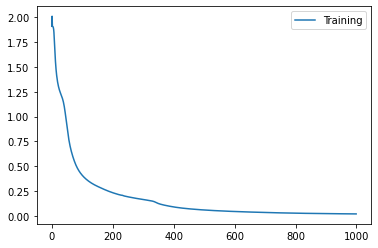

In [35]:
# Implementation of Network using Gradient Descent and AdaGrad implementation
epochs = 1000
alpha = 0.1
costs = []

epsilon = 1e-8
rW1 = np.zeros_like(parameters["W1"])
rb1 = np.zeros_like(parameters["b1"])
rW2 = np.zeros_like(parameters["W2"])
rb2 = np.zeros_like(parameters["b2"])
rW3 = np.zeros_like(parameters["W3"])
rb3 = np.zeros_like(parameters["b3"])


for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates
    rW3 = rW3 + np.square(dL_dW3)
    parameters["W3"] = parameters["W3"] - (alpha*dL_dW3)/np.sqrt(rW3 + epsilon)
    rb3 = rb3 + np.square(dL_db3)
    parameters["b3"] = parameters["b3"] - (alpha*dL_db3)/np.sqrt(rb3 + epsilon)
    
    rW2 = rW2 + np.square(dL_dW2)
    parameters["W2"] = parameters["W2"] - (alpha*dL_dW2)/np.sqrt(rW2 + epsilon)
    rb2 = rb2 + np.square(dL_db2)
    parameters["b2"] = parameters["b2"] - (alpha*dL_db2)/np.sqrt(rb2 + epsilon)
    
    rW1 = rW1 + np.square(dL_dW1)
    parameters["W1"] = parameters["W1"] - (alpha*dL_dW1)/np.sqrt(rW1 + epsilon)
    rb1 = rb1 + np.square(dL_db1)
    parameters["b1"] = parameters["b1"] - (alpha*dL_db1)/np.sqrt(rb1 + epsilon)
    costs.append(compute_cost(h3.T,Y))

print("Training Cost",costs[-1])
plt.plot(costs,label = "Training")
plt.legend()
plt.show()

In [36]:
# Prediction
k=11
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [1 0 0] 	
y= [0.98472943 0.00372298 0.01154759]


In [37]:
# Prediction on test set

# Standardizing the test set
for i in range(p):
    Xt[:,i] = (Xt[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]


#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.1286922029276069


In [38]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")

The number of datapoints in test set wrongly labeled by the NN is/are  2 out of total  53 datapoints


### RMSProp

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [40]:
# Loading dataset, splitting into training and test set
dataset = np.loadtxt("seeds_dataset.txt")
np.random.shuffle(dataset)
len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

X = train[:,:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
N,p = X.shape
out_neurons = Y.shape[1]

Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (210, 8)
Each Datapoint contains  7 features and belong to either of  3 class.


In [41]:
# Standardization of dataset
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(p):
    mean_and_std["mean"+str(i)] = np.mean(X[:,i])
    mean_and_std["std"+str(i)] = np.std(X[:,i])
# Now standardizing the training set
for i in range(p):
    X[:,i] = (X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

In [42]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [43]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [44]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [45]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [46]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [7, 12, 8, 3]


100%|██████████| 700/700 [00:00<00:00, 1047.73it/s]


Training Cost 0.0002875570877543273


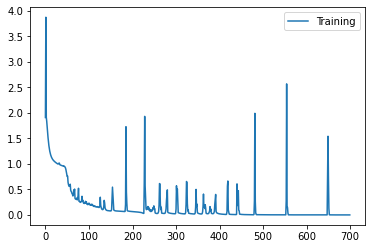

In [47]:
# Implementation of Network using Gradient Descent and RMSProp
epochs = 700
alpha = 0.1
costs = []

epsilon = 1e-8
beta = 0.9
vW1 = np.zeros_like(parameters["W1"])
vb1 = np.zeros_like(parameters["b1"])
vW2 = np.zeros_like(parameters["W2"])
vb2 = np.zeros_like(parameters["b2"])
vW3 = np.zeros_like(parameters["W3"])
vb3 = np.zeros_like(parameters["b3"])



for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates with RMSProp
    vW3 = (beta*vW3) + ((1-beta)*np.square(dL_dW3))
    parameters["W3"] = parameters["W3"] - (alpha*dL_dW3)/np.sqrt(vW3 + epsilon)
    vb3 = (beta*vb3) + ((1-beta)*np.square(dL_db3))
    parameters["b3"] = parameters["b3"] - (alpha*dL_db3)/np.sqrt(vb3 + epsilon)
    
    vW2 = (beta*vW2) + ((1-beta)*np.square(dL_dW2))
    parameters["W2"] = parameters["W2"] - (alpha*dL_dW2)/np.sqrt(vW2 + epsilon)
    vb2 = (beta*vb2) + ((1-beta)*np.square(dL_db2))
    parameters["b2"] = parameters["b2"] - (alpha*dL_db2)/np.sqrt(vb2 + epsilon)
    
    vW1 = (beta*vW1) + ((1-beta)*np.square(dL_dW1))
    parameters["W1"] = parameters["W1"] - (alpha*dL_dW1)/np.sqrt(vW1 + epsilon)
    vb1 = (beta*vb1) + ((1-beta)*np.square(dL_db1))
    parameters["b1"] = parameters["b1"] - (alpha*dL_db1)/np.sqrt(vb1 + epsilon)
    costs.append(compute_cost(h3.T,Y))

print("Training Cost",costs[-1])
plt.plot(costs,label = "Training")
plt.legend()
plt.show()

In [48]:
# Prediction
k=11
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [0 0 1] 	
y= [4.28246751e-06 2.11317816e-06 9.99993604e-01]


In [49]:
# Prediction on test set

# Standardizing the test set
for i in range(p):
    Xt[:,i] = (Xt[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]


#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.8597894591482292


In [50]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")

The number of datapoints in test set wrongly labeled by the NN is/are  3 out of total  53 datapoints


### ADAM

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [52]:
# Loading dataset, splitting into training and test set
dataset = np.loadtxt("seeds_dataset.txt")
np.random.shuffle(dataset)
len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

X = train[:,:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
N,p = X.shape
out_neurons = Y.shape[1]

Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (210, 8)
Each Datapoint contains  7 features and belong to either of  3 class.


In [53]:
# Standardization of dataset
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(p):
    mean_and_std["mean"+str(i)] = np.mean(X[:,i])
    mean_and_std["std"+str(i)] = np.std(X[:,i])
# Now standardizing the training set
for i in range(p):
    X[:,i] = (X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

In [54]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [55]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [56]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [57]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [58]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [7, 12, 8, 3]


100%|██████████| 200/200 [00:00<00:00, 662.91it/s]


Training Cost 0.006935620257095839


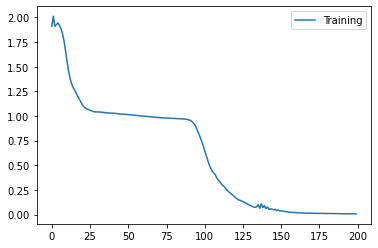

In [59]:
# Implementation of Network using Gradient Descent
epochs = 200
alpha = 0.1
costs = []

t = 0
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

mW3 = np.zeros_like(parameters["W3"])
mb3 = np.zeros_like(parameters["b3"])
vW3 = np.zeros_like(parameters["W3"])
vb3 = np.zeros_like(parameters["b3"])

mW2 = np.zeros_like(parameters["W2"])
mb2 = np.zeros_like(parameters["b2"])
vW2 = np.zeros_like(parameters["W2"])
vb2 = np.zeros_like(parameters["b2"])

mW1 = np.zeros_like(parameters["W1"])
mb1 = np.zeros_like(parameters["b1"])
vW1 = np.zeros_like(parameters["W1"])
vb1 = np.zeros_like(parameters["b1"])


for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates
    t = t + 1     # For Adam
    
    mW3 =  (beta1*mW3) + ((1-beta1)*dL_dW3)
    vW3 =  (beta2*vW3) + ((1-beta2)*np.square(dL_dW3))
    mW3_correct = mW3/(1-np.power(beta1,t))
    vW3_correct = vW3/(1-np.power(beta2,t))
    parameters["W3"] = parameters["W3"] - alpha*(mW3_correct/np.sqrt(vW3_correct + epsilon))
    
    mb3 =  (beta1*mb3) + ((1-beta1)*dL_db3)
    vb3 =  (beta2*vb3) + ((1-beta2)*np.square(dL_db3))
    mb3_correct = mb3/(1-np.power(beta1,t))
    vb3_correct = vb3/(1-np.power(beta2,t))
    parameters["b3"] = parameters["b3"] - alpha*(mb3_correct/np.sqrt(vb3_correct + epsilon))
    
    mW2 =  (beta1*mW2) + ((1-beta1)*dL_dW2)
    vW2 =  (beta2*vW2) + ((1-beta2)*np.square(dL_dW2))
    mW2_correct = mW2/(1-np.power(beta1,t))
    vW2_correct = vW2/(1-np.power(beta2,t))
    parameters["W2"] = parameters["W2"] - alpha*(mW2_correct/np.sqrt(vW2_correct + epsilon))
    
    mb2 =  (beta1*mb2) + ((1-beta1)*dL_db2)
    vb2 =  (beta2*vb2) + ((1-beta2)*np.square(dL_db2))
    mb2_correct = mb2/(1-np.power(beta1,t))
    vb2_correct = vb2/(1-np.power(beta2,t))
    parameters["b2"] = parameters["b2"] - alpha*(mb2_correct/np.sqrt(vb2_correct + epsilon))
    
    mW1 =  (beta1*mW1) + ((1-beta1)*dL_dW1)
    vW1 =  (beta2*vW1) + ((1-beta2)*np.square(dL_dW1))
    mW1_correct = mW1/(1-np.power(beta1,t))
    vW1_correct = vW1/(1-np.power(beta2,t))
    parameters["W1"] = parameters["W1"] - alpha*(mW1_correct/np.sqrt(vW1_correct + epsilon))
    
    mb1 =  (beta1*mb1) + ((1-beta1)*dL_db1)
    vb1 =  (beta2*vb1) + ((1-beta2)*np.square(dL_db1))
    mb1_correct = mb1/(1-np.power(beta1,t))
    vb1_correct = vb1/(1-np.power(beta2,t))
    parameters["b1"] = parameters["b1"] - alpha*(mb1_correct/np.sqrt(vb1_correct + epsilon))
    
    costs.append(compute_cost(h3.T,Y))

print("Training Cost",costs[-1])
plt.plot(costs,label = "Training")
plt.legend()
plt.show()

In [60]:
# Prediction
k=11
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [1 0 0] 	
y= [9.99726363e-01 8.37373593e-05 1.89899302e-04]


In [61]:
# Prediction on test set

# Standardizing the test set
for i in range(p):
    Xt[:,i] = (Xt[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]


#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.43621650182563354


In [62]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")

The number of datapoints in test set wrongly labeled by the NN is/are  2 out of total  53 datapoints
